<a href="https://colab.research.google.com/github/YadhuKrishna2001/DecisionTreee./blob/main/DecisionTreee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load Data

In [ ]:
drug=pd.read_csv("/content/drive/MyDrive/MLDatasets/drug200.csv")
drug

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Categorize Independent and Dependend Variables

In [ ]:
x = drug.iloc[:, :5]
y=drug['Drug']
print(x)

     Age Sex      BP Cholesterol  Na_to_K
0     23   F    HIGH        HIGH   25.355
1     47   M     LOW        HIGH   13.093
2     47   M     LOW        HIGH   10.114
3     28   F  NORMAL        HIGH    7.798
4     61   F     LOW        HIGH   18.043
..   ...  ..     ...         ...      ...
195   56   F     LOW        HIGH   11.567
196   16   M     LOW        HIGH   12.006
197   52   M  NORMAL        HIGH    9.894
198   23   M  NORMAL      NORMAL   14.020
199   40   F     LOW      NORMAL   11.349

[200 rows x 5 columns]


Encode categorical variables using LabelEncoder


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_bp = LabelEncoder()
le_sex = LabelEncoder()
le_cholesterol = LabelEncoder()

x['BP'] = le_bp.fit_transform(x['BP'])
x['Sex'] = le_sex.fit_transform(x['Sex'])
x['Cholesterol'] = le_cholesterol.fit_transform(x['Cholesterol'])
print(x)
print(y)


     Age  Sex  BP  Cholesterol  Na_to_K
0     23    0   0            0   25.355
1     47    1   1            0   13.093
2     47    1   1            0   10.114
3     28    0   2            0    7.798
4     61    0   1            0   18.043
..   ...  ...  ..          ...      ...
195   56    0   1            0   11.567
196   16    1   1            0   12.006
197   52    1   2            0    9.894
198   23    1   2            1   14.020
199   40    0   1            1   11.349

[200 rows x 5 columns]
0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


Model Importing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5)
model.fit(x,y)

DecisionTreeClassifier(max_depth=5)

Visualization

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64 0      0
1      1
2      1
3      2
4      1
      ..
195    1
196    1
197    2
198    2
199    1
Name: BP, Length: 200, dtype: int64
0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object


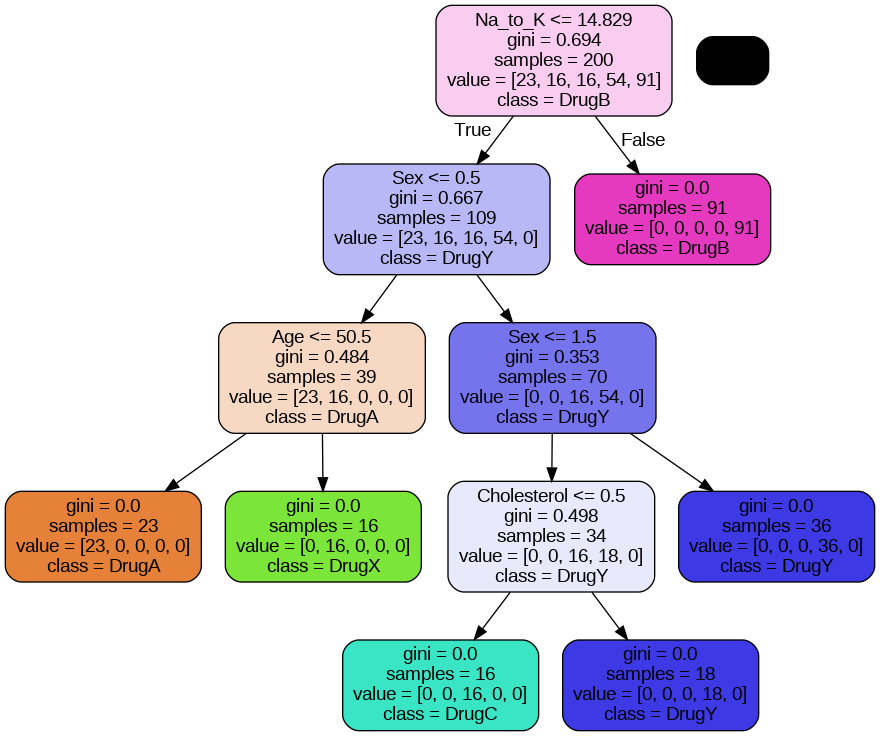

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

print(x.Age,x.BP)
print(y)
dot_data=export_graphviz(model, out_file=None, feature_names=['Age','BP','Sex','Cholesterol','Na_to_K'],
                         class_names=['DrugA', 'DrugX', 'DrugC', 'DrugY','DrugB'], rounded=True, filled=True)


graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png("decisioin_tree.png")

Image(graph.create_png())

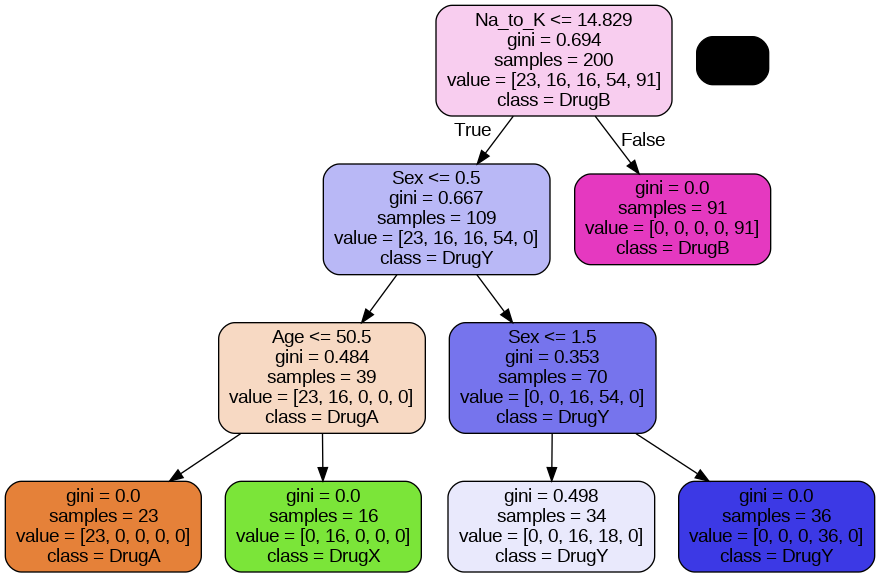

In [ ]:
# decision tree for the dataset

model2=DecisionTreeClassifier(max_depth=3)
model2.fit(x,y)

dot_data2=export_graphviz(model2, out_file=None, feature_names=['Age','BP','Sex','Cholesterol','Na_to_K'],
                         class_names=['DrugA', 'DrugX', 'DrugC', 'DrugY','DrugB'], rounded=True, filled=True)


graph2 = pydotplus.graph_from_dot_data(dot_data2)

graph2.write_png("decisioin_tree2.png")

Image(graph2.create_png())
